# Introductory Tutorial

<a target="_blank" href="https://colab.research.google.com/github/HLasse/TextDescriptives/blob/main/docs/tutorials/introductory_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

TextDescriptives lets you quickly and easily calculate a large variety of statistics and metrics from texts. 

The package includes a number of components that make it easy to only spend time extracting exactly the metrics you care about.

This tutorial introduces some of components available in TextDescriptives and how you can use them to quickly analyse a text corpus.
For more information on the components, see the [documentation](https://hlasse.github.io/TextDescriptives/).

## Using TextDescriptives
In this tutorial we'll use TextDescriptives to get a quick overview of the [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).
The dataset contains 5572 SMS messages categorized as ham or spam. 

To start, let's load a dataset and get a bit familiar with it.

In [ ]:
try:
    import textdescriptives
except:
    !pip install "textdescriptives[tutorials]"

In [1]:
import textdescriptives as td
import spacy

from textdescriptives.utils import load_sms_data

df = load_sms_data()
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### The easy way: Extract metrics with `extract_metrics`

Let's extract readability and dependency distance metrics using the `extract_metrics` function, which handles a lot of boilerplate spaCy code for us. If haven't used spacy before, you can set the parameter `lang` to the language of your text  instead of specifying `spacy_model` - then TextDescriptives will automatically download and use an appropriate model for you.

In [3]:
# assumes you have downloaded the ´en_core_web_model´
metrics = td.extract_metrics(
    text=df["message"],
    spacy_model="en_core_web_sm",
    metrics=["readability", "dependency_distance"],
)
# alternatively, you can specify the language and (optionally) the model size
# metrics = td.extract_metrics(text=df["message"], lang="en", spacy_model_size="sm", metrics=["readability, dependency_distance"])

# join the metrics to the original dataframe to get the label
metrics_df = df.join(metrics.drop(columns=["text"]))
metrics_df.head()

ℹ 'textdescriptives/descriptive_stats' component is required for
'textdescriptives.readability'. Adding to pipe.


,label,message,text,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,...,syllables_per_token_std,n_tokens,n_unique_tokens,proportion_unique_tokens,n_characters,n_sentences,dependency_distance_mean,dependency_distance_std,prop_adjacent_dependency_relation_mean,prop_adjacent_dependency_relation_std
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",90.935000,3.060000,NaN,4.0,3.116500,5.642000,15.000000,...,0.433013,20,20,1.000000,92,2,2.333333,0.833333,0.388889,0.055556
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,105.090000,-0.653333,NaN,1.2,-5.800000,-8.026667,3.000000,...,0.372678,6,6,1.000000,24,2,1.333333,0.666667,0.433333,0.233333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,92.917857,3.777143,NaN,5.6,6.260357,7.915714,28.285714,...,0.382993,28,24,0.857143,128,2,2.516807,0.659664,0.521008,0.050420
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,116.652500,-1.645000,NaN,2.2,-4.550000,-3.541818,14.590909,...,0.000000,11,9,0.818182,39,2,1.452381,0.119048,0.535714,0.035714
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",109.040000,1.280000,NaN,5.2,1.373846,2.276923,13.000000,...,0.000000,13,12,0.923077,49,1,2.066667,0.000000,0.400000,0.000000


### The configurable way: Add pipes to spaCy

If you want to use the component as part of a larger analysis with spaCy, simply add the pipeline components to an already initialized spaCy pipeline and use `extract_df` on the `Doc` object.

To do this we will use the small English pipeline. If you haven't downloaded it yet it is simple to do:

In [ ]:
try:
    nlp = spacy.load("en_core_web_sm")
except:
    # if not downloaded, download the model
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

In [4]:
nlp.add_pipe("textdescriptives/readability")
nlp.add_pipe("textdescriptives/dependency_distance")

ℹ 'textdescriptives/descriptive_stats' component is required for
'textdescriptives.readability'. Adding to pipe.


From now on, whenever we pass a document through the spacy pipeline (`nlp`), TextDescriptives will add readability and dependency distance metrics to the document.

Let's load the data and pass it through the pipeline.

In [5]:
doc = nlp.pipe(df["message"])

In [6]:
# extract the metrics as a dataframe
metrics = td.extract_df(doc, include_text=False)

In [7]:
# join the metrics to the original dataframe
spacy_pipe_metrics_df = df.join(metrics, how="left")
spacy_pipe_metrics_df.head()

,label,message,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,...,syllables_per_token_std,n_tokens,n_unique_tokens,proportion_unique_tokens,n_characters,n_sentences,dependency_distance_mean,dependency_distance_std,prop_adjacent_dependency_relation_mean,prop_adjacent_dependency_relation_std
0,ham,"Go until jurong point, crazy.. Available only ...",90.935000,3.060000,NaN,4.0,3.116500,5.642000,15.000000,0.5,...,0.433013,20,20,1.000000,92,2,2.333333,0.833333,0.388889,0.055556
1,ham,Ok lar... Joking wif u oni...,105.090000,-0.653333,NaN,1.2,-5.800000,-8.026667,3.000000,0.0,...,0.372678,6,6,1.000000,24,2,1.333333,0.666667,0.433333,0.233333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,92.917857,3.777143,NaN,5.6,6.260357,7.915714,28.285714,2.0,...,0.382993,28,24,0.857143,128,2,2.516807,0.659664,0.521008,0.050420
3,ham,U dun say so early hor... U c already then say...,116.652500,-1.645000,NaN,2.2,-4.550000,-3.541818,14.590909,0.5,...,0.000000,11,9,0.818182,39,2,1.452381,0.119048,0.535714,0.035714
4,ham,"Nah I don't think he goes to usf, he lives aro...",109.040000,1.280000,NaN,5.2,1.373846,2.276923,13.000000,0.0,...,0.000000,13,12,0.923077,49,1,2.066667,0.000000,0.400000,0.000000


That's it! Let's assure ourselves that the dataframes are identical.

In [8]:
metrics_df.equals(spacy_pipe_metrics_df)

False

## Exploratory Data Analysis
With the metrics extracted, let's do some quick exploratory data analysis to get a sense of the data

<AxesSubplot: xlabel='label', ylabel='lix'>

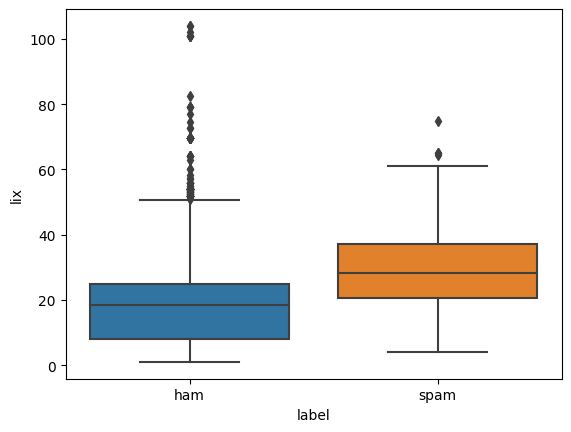

In [9]:
import seaborn as sns

sns.boxplot(x="label", y="lix", data=metrics_df)

Let's run a quick test to see if any of our metrics correlate strongly with the label

In [10]:
# encode the label as a boolean
metrics_df["is_ham"] = metrics_df["label"] == "ham"
# compute the correlation between all metrics and the label
metrics_correlations = metrics.corrwith(metrics_df["is_ham"]).sort_values(
    key=abs, ascending=False
)
metrics_correlations[:10]

token_length_std              -0.409000
n_characters                  -0.408325
n_unique_tokens               -0.363069
coleman_liau_index            -0.322233
automated_readability_index   -0.322176
rix                           -0.303665
n_tokens                      -0.298789
dependency_distance_std       -0.296832
token_length_mean             -0.294734
sentence_length_std           -0.294251
dtype: float64

That's some pretty high correlations - let's plot a few of them! 

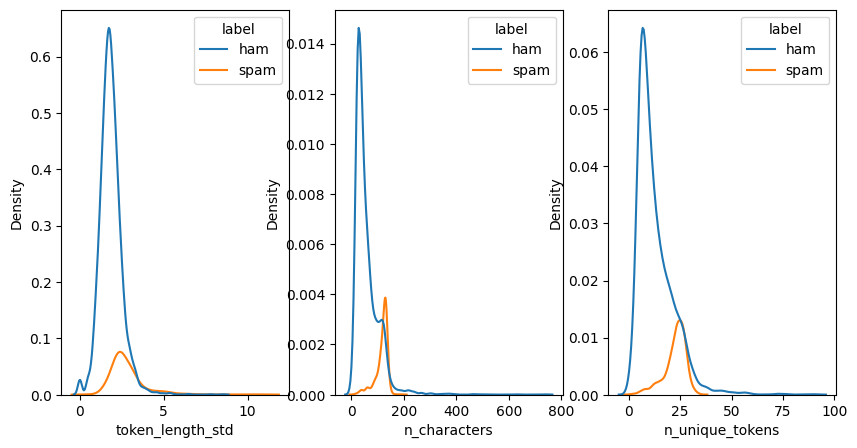

In [11]:
# plot a kde plot for the top 3 metrics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=False)
for i, metric in enumerate(metrics_correlations.index[:3]):
    sns.kdeplot(metrics_df, x=metric, hue="label", ax=ax[i])

Cool! We've now done a quick analysis of the SMS dataset and found the distributions of e.g. the standard deviation of token length, the number of characters, and the number of unique tokens to be distributed differently between the actual SMS's and spam. 

Next steps could be continue the exploratory data analysis or to build a simple classifier using the extracted metrics.